# This program extracts the accelerometer (as vibration detector) data and feeds such data to the Polynomial(or Ridge) Regression such that the weight prediction result can be used for detecting vibration in real time.

In [ ]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
import matplotlib as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

In [2]:
noise_hum_path = r"D:/Telegram Files/noiseHum/"
metal_hum_new_path = r"D:/Telegram Files/metalhum_new/"
hand_hum_path = r"D:/Telegram Files/handhum/"

def read_file(_path):
    os.chdir(_path)
    temp_data = pd.DataFrame()
    #print(temp_data)
    for file in os.listdir():
        if file.endswith('.xls'):
            file_path = f"{_path}{file}"
            data = pd.read_excel(file_path)
            data.columns = [s for s in range(0,25)]
            temp_data = pd.concat([temp_data, data])           
    
    return temp_data


noise_hum = read_file(noise_hum_path)
metal_hum_new = read_file(metal_hum_new_path)
hand_hum = read_file(hand_hum_path)


In [3]:
hum = pd.DataFrame(noise_hum)
bang = pd.DataFrame(metal_hum_new)

hand_ = pd.DataFrame(hand_hum)
# hand inside hum
hum_combined = pd.concat([hum, hand_], ignore_index = True)
# hand inside metal
metal_hand = pd.concat([bang, hand_], ignore_index = True)

hum['Labeled'] = -1
hand_['Labeled'] = -1
hum_combined['Labeled'] = -1
bang['Labeled'] = 1
metal_hand['Labeled'] = 1


hum_combined.columns = bang.columns

# hum combined vs metal
data_joined1 = pd.concat([hum_combined, bang], ignore_index =True)
# hum vs metal+ hand
data_joined2 = pd.concat([hum, metal_hand], ignore_index =True)
# metal vs hand
data_joined3 = pd.concat([hand_, bang], ignore_index =True)


In [4]:
X1 = data_joined1.loc[:,0:24] 
Y1 = data_joined1.loc[:,'Labeled']
X2 = data_joined2.loc[:,0:24] 
Y2 = data_joined2.loc[:,'Labeled']
X3 = data_joined3.loc[:,0:24] 
Y3 = data_joined3.loc[:,'Labeled']


In [5]:
# split the data for train/test(e.g 70/30)
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X1, Y1, test_size=0.3) # for determining bang or noise
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X2, Y2, test_size=0.3)
X_train3,X_test3,Y_train3,Y_test3 = train_test_split(X3, Y3, test_size=0.3)


### The reason why the second order of polynomial is deemed as appropriate for the experiment is that upon data collection and training with linear regression(or first order regression), it is found that Order 2 provided slightly better accuracy at predicting. Thus, we ought that to be most suitable for the testing.

In [6]:
order = 2
poly = PolynomialFeatures(order)


In [7]:
# train the data
P_1 = poly.fit_transform(X_train1)
P_2 = poly.fit_transform(X_train2)
P_3 = poly.fit_transform(X_train3)

### Since the number of samples is greater than its parameters(e.g. m > d), this figure below explains the equation used for predicting and weight assignment in regression model.
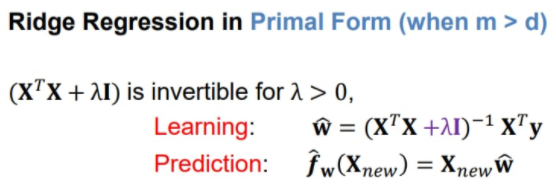

In [8]:
# create regression model
reg1 = 0.0001*np.identity(P_1.shape[1])
w_dual_ridge1 = (inv(P_1.T@P_1 + reg1)) @ P_1.T @ Y_train1
print(w_dual_ridge1)

[-1.09331028e+00  5.42116731e+00 -1.04243432e+01 -3.56076289e-01
 -3.84846057e+00  8.20499916e-02  6.84035181e+00 -2.16571851e+01
  1.90668394e+00  1.48524909e+01  2.31487581e+01  1.56183762e+01
  1.55127602e+01  1.63805993e+00 -3.00945856e+00  1.19395560e+01
  1.19686075e+01  1.83299014e+01  3.56250875e+00  1.19961868e+01
  1.35108255e+01  3.52800334e+00  9.97162055e+00  9.85429774e+00
  1.76420616e+01  2.61703671e+01  8.00400289e+00 -6.42952406e+01
  2.93532227e+01  4.18670737e+01 -1.17128159e+00 -3.49697811e+01
 -1.47771287e+01 -6.58423580e+00 -1.54553687e+01 -5.13295624e+01
 -6.55394627e+00 -3.15318468e+00  5.04236855e+01  5.67397786e+01
  3.08872515e+01  5.36250809e+01  2.94723711e+01  5.67106560e+01
 -2.56194563e-01  4.07972128e+01 -7.70735224e+00  7.44031842e+00
 -3.08713850e+00  3.83868509e+00  1.65606717e+01  6.35389905e+00
 -5.40083822e+00 -1.94398652e+01  2.27708766e+01  3.61000508e+00
 -6.64642525e+00 -6.95837031e+00  3.17626583e+01  1.33082620e+01
 -1.54075444e+00 -1.47583

In [9]:
reg2 = 0.0001*np.identity(P_2.shape[1])
w_dual_ridge2 = (inv(P_2.T@P_2 + reg2)) @ P_2.T @ Y_train2
print(w_dual_ridge2)

[-3.27937234e-01 -1.79292764e+01 -1.00302687e+01 -4.42828810e+00
 -5.93858871e+00 -2.54844823e+00  8.06409200e+00  1.41386658e+00
  5.32966633e+00  3.81972674e+00  3.47571047e+00  6.06884352e+00
  4.65021944e+00  4.54100738e+00 -2.15351876e-01  9.32463066e+00
  1.67848439e+01  7.35502688e+00  2.09699487e+01  1.05563973e+01
  1.12356780e+01  1.07490469e+01  1.18015073e+00  2.51793521e+00
  2.18866794e+01  3.46767117e+01  1.68008302e+01 -1.09649261e+02
  1.86285773e+01  1.21003129e+02 -1.06043395e+01  3.91331702e+01
  4.25711572e+00  2.45829363e-01  1.46132590e+01 -1.00410857e+01
  1.90632089e+01  9.68469579e+00  3.36607598e+01  4.59791161e+01
  2.10059817e+01  3.43989183e+01  3.08044414e+01  9.27947194e+01
  2.63215915e+01  3.59963819e+01  5.71799254e+00 -1.61825447e+00
  1.59591119e+01  1.47501523e+01  1.41955184e+01  4.20903931e+00
 -6.56527269e+00 -6.70015215e+00  1.74142497e+01 -1.32177048e+01
  1.86908217e+01 -4.48051890e+00  2.81499501e+01  2.28432966e+00
  2.65729343e+01 -2.06600

In [10]:
reg3 = 0.0001*np.identity(P_3.shape[1])
w_dual_ridge3 = (inv(P_3.T@P_3 + reg3)) @ P_3.T @ Y_train3
print(w_dual_ridge3)

[-1.15962234e+00  2.61112451e+01  3.22383049e+01  2.16586113e+01
 -9.42823380e+00  1.54877322e+01  5.22735069e+00 -3.35650812e+01
 -1.19706421e+01  1.84206687e+01  4.08631831e+01  2.05522170e+01
  2.13592567e+01 -8.65288910e-02 -1.35303746e+01  1.83042166e+01
  1.05123142e+01  2.39558360e+01 -4.46034867e+00  1.09588308e+01
 -4.28845836e+00 -5.78158173e+00  1.10431540e+01  2.11876327e+01
  3.16150211e+01  2.37939548e+01 -4.34556638e+00 -1.45126747e+01
 -1.00417737e+01 -8.50259569e+00 -1.60613270e+01 -9.57534794e+00
 -4.11672707e+00 -9.47034584e+00 -9.46191481e+00 -1.58154674e+01
 -1.66583787e+01 -1.25334037e+01 -3.65073931e+00 -3.78725399e+00
 -1.33025392e+01 -1.09821399e+01 -7.00500429e+00 -1.01916431e+01
 -1.67783058e+01 -9.77472620e+00 -9.76570104e+00 -1.98914886e+00
 -1.02633125e+01 -7.52476008e+00 -9.46609448e+00 -1.66479161e+02
 -9.49780699e+01  8.47372790e+01 -1.53444001e+02 -5.59558042e+01
  1.89655069e+02  4.60733550e+01 -5.86437421e+01 -7.07039442e+01
 -1.07012861e+02 -3.99220

In [11]:
# Feed the test data to the classifier
P_test1 = poly.fit_transform(X_test1)
P_test2= poly.fit_transform(X_test2)
P_test3 = poly.fit_transform(X_test3)

# generate the prediction result
y_pred1 = P_test1 @ w_dual_ridge1
y_pred2 = P_test2 @ w_dual_ridge2
y_pred3 = P_test3 @ w_dual_ridge3


In [12]:
# sort the prediction to either 1 or -1 to be compared for accuracy later
y_pred_sorted = []
y_pred_sorted2 = []
y_pred_sorted3 = []
type_pred_sorted = []
for i in y_pred1:
    if i < 0:
        y_pred_sorted.append(-1)
        
    else:
        y_pred_sorted.append(1)
        
      

In [13]:
for i in y_pred2:
    if i < 0:
        y_pred_sorted2.append(-1)
        
    else:
        y_pred_sorted2.append(1)
        
for i in y_pred3:
    if i < 0:
        y_pred_sorted3.append(-1)
        
    else:
        y_pred_sorted3.append(1)
        

In [14]:
# Generate accuracies
accuracy1 = accuracy_score(y_pred_sorted,Y_test1)
accuracy2 = accuracy_score(y_pred_sorted2,Y_test2)
accuracy3 = accuracy_score(y_pred_sorted3,Y_test3)

In [15]:
accuracy = [accuracy1, accuracy2, accuracy3]

In [19]:
# show the accuracyof 3 scenarios
pd.DataFrame(accuracy, columns=["Accuracy"], index=['Hum+Hand vs Metal', 'Metal+Hand vs Hum', 'M'])

,Accuracy
Hum+Hand vs Metal,0.829321
Metal+Hand vs Hum,0.814409
M,0.788325


In [37]:
w_dual_file1 = pd.DataFrame(w_dual_ridge1)
w_dual_file2 = pd.DataFrame(w_dual_ridge2)
w_dual_file3 = pd.DataFrame(w_dual_ridge3)

In [39]:
w_dual_file1.to_excel('pred_param_metal_hand_hum_reduced.xlsx', sheet_name='hum_')
w_dual_file2.to_excel('pred_param_metal_hand_hum2_reduced.xlsx', sheet_name='hum_')
w_dual_file3.to_excel('pred_param_metal_hand_reduced.xlsx', sheet_name='hum_')